<a href="https://colab.research.google.com/github/MayurPatil2711/SURE-IIT-Hyderabad/blob/main/Data_Analysis_SURE_IITH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pprint
from io import BytesIO
from PIL import Image
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath = '/content/drive/MyDrive/IITH SURE/Same Diameter Data.xlsx'

# D1 = D2 = 25 mm

In [ ]:
mm_25_data = pd.read_excel(filepath, sheet_name='Diameter_25mm')
mm_25_data

,Gap Width Theoretical (in mm),Gap Width Experimental (in mm),Offset from Centre,Exp No.,Max Radius (in pixels),Conversion Factor (in pixels/mm),Max. Radius (in mm),W',W' avg.,Jet's Direction,Collapse Type,Remarks
0,20.0,20.087,0.12500,1.0,55.0,7.6667,7.173882,2.800018,2.801461,Towards nearer solid wall with high velocity,Centre Collapse,NaN
1,NaN,19.220,NaN,2.0,52.0,7.5833,6.857173,2.802904,NaN,Towards nearer solid wall with high velocity,Centre Collapse,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,19.043,0.06250,1.0,51.0,7.5750,6.732673,2.828446,2.843198,Equal flow towards both walls,Split After collapse,Larger volume of jet towards larger diameter c...
4,NaN,18.834,NaN,2.0,49.0,7.5750,6.468647,2.911583,NaN,Towards nearer solid wall with medium velocity,Centre Collapse,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
90,NaN,30.454,NaN,3.0,47.0,7.5250,6.245847,4.875880,NaN,Towards nearer solid wall with low velocity,Spherical Collapse,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,30.400,0.03125,1.0,52.0,7.5000,6.933333,4.384615,4.505140,No flow,Spherical Collapse,NaN
93,NaN,29.989,NaN,2.0,49.0,7.5750,6.468647,4.636055,NaN,Towards nearer solid wall with low velocity,Spherical Collapse,NaN


In [ ]:
required_data = mm_25_data[['Gap Width Experimental (in mm)', 'Offset from Centre', "W'", 'Collapse Type']]
required_data = required_data.dropna(how='all')
required_data = required_data.fillna(method='ffill')
required_data["b'"] = required_data["Gap Width Experimental (in mm)"]*required_data['Offset from Centre']
required_data

,Gap Width Experimental (in mm),Offset from Centre,W',Collapse Type,b'
0,20.087,0.12500,2.800018,Centre Collapse,2.510875
1,19.220,0.12500,2.802904,Centre Collapse,2.402500
3,19.043,0.06250,2.828446,Split After collapse,1.190187
4,18.834,0.06250,2.911583,Centre Collapse,1.177125
5,18.717,0.06250,2.789567,Centre Collapse,1.169812
...,...,...,...,...,...
89,30.526,0.06250,4.734645,Spherical Collapse,1.907875
90,30.454,0.06250,4.875880,Spherical Collapse,1.903375
92,30.400,0.03125,4.384615,Spherical Collapse,0.950000
93,29.989,0.03125,4.636055,Spherical Collapse,0.937156


In [ ]:
required_data['Collapse Type'].unique()

array(['Centre Collapse', 'Split After collapse', 'Split Collapse',
       'Spherical Collapse', 'Spherical + Centre Collapse'], dtype=object)

In [ ]:
spherical_collapse = required_data[required_data['Collapse Type'] == 'Spherical Collapse']
centre_collapse = required_data[required_data['Collapse Type'] == 'Centre Collapse']
split_after_collapse = required_data[required_data['Collapse Type'] == 'Split After Collapse']
split_collapse = required_data[required_data['Collapse Type'] == 'Split Collapse']
combined_collapse = required_data[required_data['Collapse Type'] == 'Spherical + Centre Collapse']

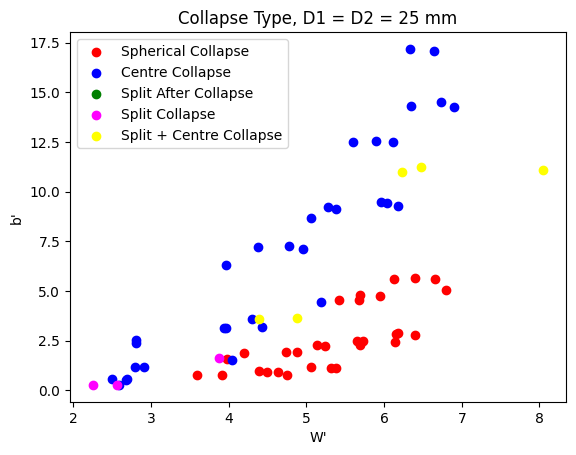

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter(spherical_collapse["W'"], spherical_collapse["b'"], color = 'red')
plt.scatter(centre_collapse["W'"], centre_collapse["b'"], color = 'blue')
plt.scatter(split_after_collapse["W'"], split_after_collapse["b'"], color = 'green')
plt.scatter(split_collapse["W'"], split_collapse["b'"], color = 'magenta')
plt.scatter(combined_collapse["W'"], combined_collapse["b'"], color = 'yellow')
plt.xlabel("W'"), plt.ylabel("b'")
plt.legend(['Spherical Collapse', 'Centre Collapse', 'Split After Collapse', 'Split Collapse', 'Split + Centre Collapse'])
plt.title('Collapse Type, D1 = D2 = 25 mm')
plt.show()
#plt.savefig("/content/drive/MyDrive/IITH SURE/Plots/D1 = D2 = 25 mm.jpg")

# D1 = D2 = 40 mm

In [ ]:
mm_40_data = pd.read_excel(filepath, sheet_name='Diameter_40mm')
mm_40_data

,Gap Width Theoretical (in mm),Gap Width Experimental (in mm),Offset ratio,Exp No.,Max Radius (in mm),W',W'_Avg,Jet Direction,Collapse Type,Remarks
0,45.0,43.280,0.250000,1.0,6.811,6.354427,6.185567,Towards Solid Wall with High Velocity,Centre Collapse,NaN
1,NaN,43.086,NaN,2.0,7.280,5.918407,NaN,Towards Solid Wall with High Velocity,Centre Collapse,NaN
2,NaN,45.690,NaN,3.0,7.271,6.283867,NaN,Towards Solid Wall with High Velocity,Centre Collapse,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,47.231,0.125000,1.0,7.474,6.319374,6.751023,No flow towards Solid Wall,Centre Collapse,Significant amount of small bubble like struct...
...,...,...,...,...,...,...,...,...,...,...
88,20.0,20.667,0.015625,1.0,5.149,4.013789,4.013789,Equal flow towards both walls,Centre Collapse,"Dumpbell-like shape, equally divided on both s..."
89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,NaN,21.173,0.062500,1.0,5.800,3.650517,3.650517,Towards Solid wall with High velocity,Split Collapse,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
required_data = mm_40_data[['Gap Width Experimental (in mm)', 'Offset ratio', "W'", 'Collapse Type']]
required_data = required_data.dropna(how='all')
required_data = required_data.fillna(method='ffill')
required_data["b'"] = required_data["Gap Width Experimental (in mm)"]*required_data['Offset ratio']
required_data

,Gap Width Experimental (in mm),Offset ratio,W',Collapse Type,b'
0,43.280,0.250000,6.354427,Centre Collapse,10.820000
1,43.086,0.250000,5.918407,Centre Collapse,10.771500
2,45.690,0.250000,6.283867,Centre Collapse,11.422500
4,47.231,0.125000,6.319374,Centre Collapse,5.903875
5,46.108,0.125000,6.779591,Spherical Collapse,5.763500
...,...,...,...,...,...
85,27.869,0.015625,4.916902,Spherical Collapse,0.435453
86,27.976,0.015625,4.583224,Split After Collapse,0.437125
88,20.667,0.015625,4.013789,Centre Collapse,0.322922
90,21.173,0.062500,3.650517,Split Collapse,1.323312


In [ ]:
required_data['Collapse Type'].unique()

array(['Centre Collapse', 'Spherical Collapse', 'Split After Collapse',
       'Split Collapse'], dtype=object)

In [ ]:
spherical_collapse = required_data[required_data['Collapse Type'] == 'Spherical Collapse']
centre_collapse = required_data[required_data['Collapse Type'] == 'Centre Collapse']
split_after_collapse = required_data[required_data['Collapse Type'] == 'Split After Collapse']
split_collapse = required_data[required_data['Collapse Type'] == 'Split Collapse']

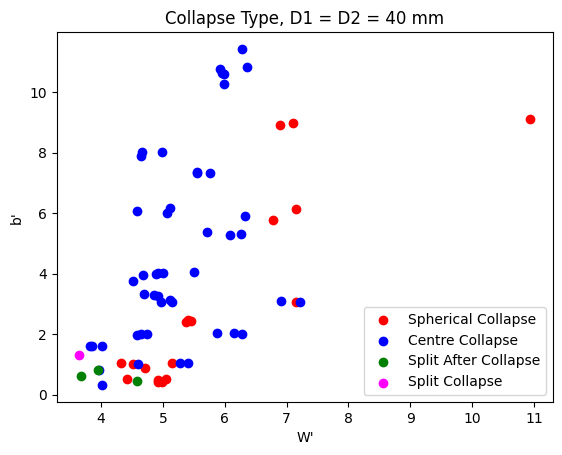

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter(spherical_collapse["W'"], spherical_collapse["b'"], color = 'red')
plt.scatter(centre_collapse["W'"], centre_collapse["b'"], color = 'blue')
plt.scatter(split_after_collapse["W'"], split_after_collapse["b'"], color = 'green')
plt.scatter(split_collapse["W'"], split_collapse["b'"], color = 'magenta')
plt.xlabel("W'"), plt.ylabel("b'")
plt.legend(['Spherical Collapse', 'Centre Collapse', 'Split After Collapse', 'Split Collapse'])
plt.title('Collapse Type, D1 = D2 = 40 mm')
plt.show()
#plt.savefig("/content/drive/MyDrive/IITH SURE/Plots/D1 = D2 = 40 mm.jpg")

# D1 = D2 = 50 mm

In [ ]:
mm_50_data = pd.read_excel(filepath, sheet_name='Diameter_50mm')
mm_50_data

,Gap Width Theoretical (in mm),Gap Width Experimental (in mm),Offset from Centre,Exp No.,Max Radius (in pixels),Conversion Factor (in pixels/mm),Max. Radius (in mm),W',W' Avg.,Jet_Direction,Collapse Type,Remarks
0,25.0,24.514,0.06250,1.0,57.0,8.3014,6.866312,3.570185,3.518056,Towards nearer wall with low velocity,Split After Collapse,"Dumpbell-like shape, larger volume towards nea..."
1,NaN,24.828,NaN,2.0,59.0,8.2167,7.180498,3.457699,NaN,Towards nearer wall with low velocity,Split After Collapse,"Dumpbell-like shape, larger volume towards nea..."
2,NaN,24.562,NaN,3.0,57.0,8.1833,6.965405,3.526284,NaN,Towards nearer wall with low velocity,Split After Collapse,"Dumpbell-like shape, larger volume towards nea..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,26.574,0.03125,1.0,52.0,7.6015,6.840755,3.884659,3.645259,Towards nearer solid wall with low velocity,Centre Collapse,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
136,NaN,5.763,NaN,3.0,69.0,7.6345,NaN,NaN,NaN,NaN,NaN,NaN
137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,NaN,5.525,0.06250,1.0,68.0,7.7833,NaN,NaN,NaN,NaN,NaN,NaN
139,NaN,4.984,NaN,2.0,71.0,7.6250,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
required_data = mm_50_data[['Gap Width Experimental (in mm)', 'Offset from Centre', "W'", 'Collapse Type']]
required_data = required_data.dropna(how='all')
required_data = required_data.fillna(method='ffill')
required_data["b'"] = required_data["Gap Width Experimental (in mm)"]*required_data['Offset from Centre']
required_data

,Gap Width Experimental (in mm),Offset from Centre,W',Collapse Type,b'
0,24.514,0.06250,3.570185,Split After Collapse,1.532125
1,24.828,0.06250,3.457699,Split After Collapse,1.551750
2,24.562,0.06250,3.526284,Split After Collapse,1.535125
4,26.574,0.03125,3.884659,Centre Collapse,0.830438
5,24.106,0.03125,3.568633,Center Collapse,0.753313
...,...,...,...,...,...
135,5.604,0.12500,2.537689,Centre Collapse + Split Collapse,0.700500
136,5.763,0.12500,2.537689,Centre Collapse + Split Collapse,0.720375
138,5.525,0.06250,2.537689,Centre Collapse + Split Collapse,0.345313
139,4.984,0.06250,2.537689,Centre Collapse + Split Collapse,0.311500


In [ ]:
required_data['Collapse Type'].unique()

array(['Split After Collapse', 'Centre Collapse', 'Center Collapse',
       'Split Collapse', 'Spherical Collapse', 'centre Collapse',
       'Spehrical Collapse', 'Centre Collapse + Split Collapse'],
      dtype=object)

In [ ]:
spherical_collapse = required_data[required_data['Collapse Type'] == 'Spherical Collapse']
centre_collapse = required_data[required_data['Collapse Type'] == 'Centre Collapse']
split_after_collapse = required_data[required_data['Collapse Type'] == 'Split After Collapse']
split_collapse = required_data[required_data['Collapse Type'] == 'Split Collapse']
combined_collapse = required_data[required_data['Collapse Type'] == 'Spherical + Centre Collapse']

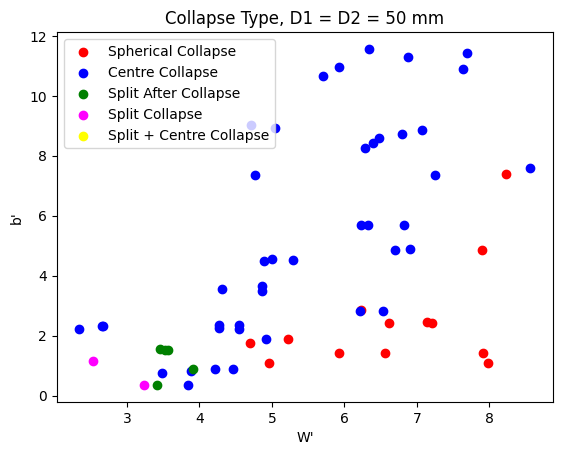

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter(spherical_collapse["W'"], spherical_collapse["b'"], color = 'red')
plt.scatter(centre_collapse["W'"], centre_collapse["b'"], color = 'blue')
plt.scatter(split_after_collapse["W'"], split_after_collapse["b'"], color = 'green')
plt.scatter(split_collapse["W'"], split_collapse["b'"], color = 'magenta')
plt.scatter(combined_collapse["W'"], combined_collapse["b'"], color = 'yellow')
plt.xlabel("W'"), plt.ylabel("b'")
plt.legend(['Spherical Collapse', 'Centre Collapse', 'Split After Collapse', 'Split Collapse', 'Split + Centre Collapse'])
plt.title('Collapse Type, D1 = D2 = 50 mm')
plt.show()
#plt.savefig("/content/drive/MyDrive/IITH SURE/Plots/D1 = D2 = 50 mm.jpg")

# All Plots of Same Diameter

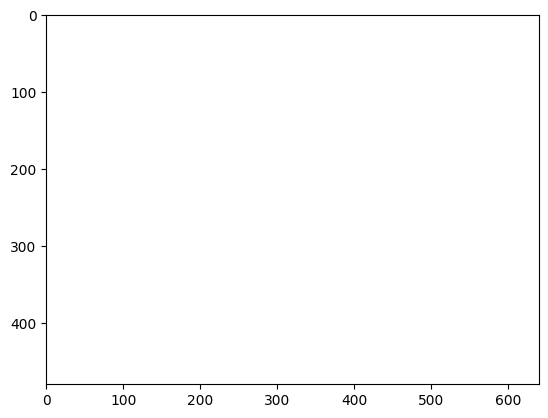

In [ ]:
mm_25_plot = plt.imread('/content/drive/MyDrive/IITH SURE/Plots/D1 = D2 = 25 mm.jpg')
plt.imshow(mm_25_plot)
#mm_40_plot = plt.imread('/content/drive/MyDrive/IITH SURE/Plots/D1 = D2 = 40 mm.png')
#mm_50_plot = plt.imread('/content/drive/MyDrive/IITH SURE/Plots/D1 = D2 = 50 mm.png')


#plt.imshow(mm_40_plot)
#plt.imshow(mm_50_plot)
#plt.show()